In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from scipy import stats

%matplotlib inline

In [123]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
import pandas as pd

#Read input data
df_test = pd.read_csv('house_test.csv')
df_train = pd.read_csv('house_train.csv')

#df_train['Data_Split'] = 'train'
#df_test['Data_Split'] = 'test'
#df = pd.concat([df_train, df_test])

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [37]:
#Find any missing values in the dataset
df_train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [62]:
### NaN values in the DF
df_train.isna().sum().sum()

np.int64(7829)

In [63]:
### Removes rows or columns containing NaN values
df_train.fillna(0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


In [64]:
###Removing Irrelevant coloumn
columns_to_keep = ['SalePrice','MoSold','YrSold', 'MSZoning','LotArea','Alley','Utilities','BldgType','OverallCond','YearBuilt','MasVnrArea','TotalBsmtSF', 'Heating', 'CentralAir', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageYrBlt', 'PoolArea', 'WoodDeckSF', 'OpenPorchSF', ]
df_train1 = df_train[columns_to_keep]

In [65]:
df_train1.isnull().sum()


,0
SalePrice,0
MoSold,0
YrSold,0
MSZoning,0
LotArea,0
Alley,1369
Utilities,0
BldgType,0
OverallCond,0
YearBuilt,0


In [68]:
## We fill the nan value with 0 because some houses do not have garage
df_train1.GarageYrBlt.fillna(0)
df_train1.GarageYrBlt.dropna()

,GarageYrBlt
0,2003.0
1,1976.0
2,2001.0
3,1998.0
4,2000.0
...,...
1455,1999.0
1456,1978.0
1457,1941.0
1458,1950.0


In [69]:
## We fill the nan value with 0 because some houses do not have alley access
df_train1.Alley.fillna(0)
df_train1.Alley.dropna()

,Alley
21,Grvl
30,Pave
56,Pave
79,Grvl
87,Pave
...,...
1404,Grvl
1414,Pave
1427,Grvl
1432,Grvl


In [72]:
# label several label with specific grading system.
def SC_LabelEncoder3(text):
    if text == "Grvl":
        return 1
    elif text == "Pave":
        return 2
    else:
        return 0

def SC_LabelEncoder2(text):
    if text == "A":
        return 1
    elif text == "C":
        return 2
    elif text == "FV":
        return 3
    elif text == "RP":
        return 4
    elif text == "I":
        return 5
    elif text == "RH":
        return 6
    elif text == "RL":
        return 7
    elif text == "RM":
        return 8
    else:
        return 0

def SC_LabelEncoder(text):
    if text == "AllPub":
        return 4
    elif text == "NoSewr":
        return 3
    elif text == "NoSeWa":
        return 2
    elif text == "ELO":
        return 1
    else:
        return  0

def SC_LabelEncoder4(text):
    if text == "1Fam":
        return 1
    elif text == "2FmCon":
        return 2
    elif text == "Duplx":
        return 3
    elif text == "TwnhsE":
        return 4
    elif text == "TwnhsI":
        return 4
    else:
        return 0

def SC_LabelEncoder5(text):

    if text == "Floor":
        return 1
    elif text == "GasA":
        return 2
    elif text == "GasW":
        return 3
    elif text == "Grav":
        return 4
    elif text == "OthW":
        return 5
    elif text == "Wall":
        return 6
    else:
        return 0

def SC_LabelEncoder6(text):
    if text == "Y":
        return 1
    else:
        return 0

def SC_LabelEncoder7(text):
    if text == "Nan":
        return 0.1
    else:
        return 0


df_train1["Alley"] = df_train1["Alley"].apply(SC_LabelEncoder3)
df_train1["MSZoning"] = df_train1["MSZoning"].apply(SC_LabelEncoder2)
df_train1["Utilities"] = df_train1["Utilities"].apply(SC_LabelEncoder)
df_train1["BldgType"] = df_train1["BldgType"].apply(SC_LabelEncoder4)
df_train1["Heating"] = df_train1["Heating"].apply(SC_LabelEncoder5)
df_train1["CentralAir"] = df_train1["CentralAir"].apply(SC_LabelEncoder6)

df_train1["MasVnrArea"] = df_train1["MasVnrArea"].apply(SC_LabelEncoder7)
df_train1["GarageYrBlt"] = df_train1["GarageYrBlt"].apply(SC_LabelEncoder7)

/tmp/ipython-input-846073779.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1["Alley"] = df_train1["Alley"].apply(SC_LabelEncoder3)
/tmp/ipython-input-846073779.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1["MSZoning"] = df_train1["MSZoning"].apply(SC_LabelEncoder2)
/tmp/ipython-input-846073779.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [73]:
df_train1.isna().sum()


,0
SalePrice,0
MoSold,0
YrSold,0
MSZoning,0
LotArea,0
Alley,0
Utilities,0
BldgType,0
OverallCond,0
YearBuilt,0


In [74]:
df_train1.head(10)

,SalePrice,MoSold,YrSold,MSZoning,LotArea,Alley,Utilities,BldgType,OverallCond,YearBuilt,...,Heating,CentralAir,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,PoolArea,WoodDeckSF,OpenPorchSF
0,208500,2,2008,0,8450,0,0,0,5,2003,...,0,0,2,1,3,0,0,0,0,61
1,181500,5,2007,0,9600,0,0,0,8,1976,...,0,0,2,0,3,1,0,0,298,0
2,223500,9,2008,0,11250,0,0,0,5,2001,...,0,0,2,1,3,1,0,0,0,42
3,140000,2,2006,0,9550,0,0,0,5,1915,...,0,0,1,0,3,1,0,0,0,35
4,250000,12,2008,0,14260,0,0,0,5,2000,...,0,0,2,1,4,1,0,0,192,84
5,143000,10,2009,0,14115,0,0,0,5,1993,...,0,0,1,1,1,0,0,0,40,30
6,307000,8,2007,0,10084,0,0,0,5,2004,...,0,0,2,0,3,1,0,0,255,57
7,200000,11,2009,0,10382,0,0,0,6,1973,...,0,0,2,1,3,2,0,0,235,204
8,129900,4,2008,0,6120,0,0,0,5,1931,...,0,0,2,0,2,2,0,0,90,0
9,118000,1,2008,0,7420,0,0,0,6,1939,...,0,0,1,0,2,2,0,0,0,4


In [75]:
import numpy as np
from sklearn.preprocessing import StandardScaler

#Inicializar el escalador
scaler = StandardScaler(with_mean=True, with_std=True)

#Normalizar los datos
df_train_normal = scaler.fit_transform(df_train1)

#Mostrar los registros normalizados
df_train_normal

#Crear de nuevo el DF
df_train_clean = pd.DataFrame(df_train_normal, columns=df_train1.columns)
df_train_clean

,SalePrice,MoSold,YrSold,MSZoning,LotArea,Alley,Utilities,BldgType,OverallCond,YearBuilt,...,Heating,CentralAir,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,PoolArea,WoodDeckSF,OpenPorchSF
0,0.347273,-1.599111,0.138777,0.0,-0.207142,0.0,0.0,0.0,-0.517200,1.050994,...,0.0,0.0,0.789741,1.227585,0.163779,-0.951226,0.0,-0.068692,-0.752176,0.216503
1,0.007288,-0.489110,-0.614439,0.0,-0.091886,0.0,0.0,0.0,2.179628,0.156734,...,0.0,0.0,0.789741,-0.761621,0.163779,0.600495,0.0,-0.068692,1.626195,-0.704483
2,0.536154,0.990891,0.138777,0.0,0.073480,0.0,0.0,0.0,-0.517200,0.984752,...,0.0,0.0,0.789741,1.227585,0.163779,0.600495,0.0,-0.068692,-0.752176,-0.070361
3,-0.515281,-1.599111,-1.367655,0.0,-0.096897,0.0,0.0,0.0,-0.517200,-1.863632,...,0.0,0.0,-1.026041,-0.761621,0.163779,0.600495,0.0,-0.068692,-0.752176,-0.176048
4,0.869843,2.100892,0.138777,0.0,0.375148,0.0,0.0,0.0,-0.517200,0.951632,...,0.0,0.0,0.789741,1.227585,1.390023,0.600495,0.0,-0.068692,0.780197,0.563760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.074560,0.620891,-0.614439,0.0,-0.260560,0.0,0.0,0.0,-0.517200,0.918511,...,0.0,0.0,0.789741,1.227585,0.163779,0.600495,0.0,-0.068692,-0.752176,-0.100558
1456,0.366161,-1.599111,1.645210,0.0,0.266407,0.0,0.0,0.0,0.381743,0.222975,...,0.0,0.0,0.789741,-0.761621,0.163779,2.152216,0.0,-0.068692,2.033231,-0.704483
1457,1.077611,-0.489110,1.645210,0.0,-0.147810,0.0,0.0,0.0,3.078570,-1.002492,...,0.0,0.0,0.789741,-0.761621,1.390023,2.152216,0.0,-0.068692,-0.752176,0.201405
1458,-0.488523,-0.859110,1.645210,0.0,-0.080160,0.0,0.0,0.0,0.381743,-0.704406,...,0.0,0.0,-1.026041,-0.761621,-1.062465,-0.951226,0.0,-0.068692,2.168910,-0.704483


In [76]:
### Confirm we have the mean close to 0 and std close to 1
mean=np.mean(df_train_normal[:,0])
std=np.std(df_train_normal[:,0])
print(f"the mean is {mean} and the std is {std}")

the mean is 1.3626846987180004e-16 and the std is 0.9999999999999998


### PCA

In [93]:
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [89]:
X, y = df_train_clean.drop("SalePrice", axis=1), df_train_clean["SalePrice"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [96]:
from sklearn.neighbors import KNeighborsRegressor
max_score = 0
max_k = 0
for k in range(1, 100):
    # Use KNeighborsRegressor for regression task
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    # Use mean squared error or R-squared for regression evaluation
    score = neigh.score(X_test, y_test)
    if score > max_score:
        max_k = k
        max_score = score

In [97]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 10  to get the best prediction, then the average accuracy is  0.6773194784820504


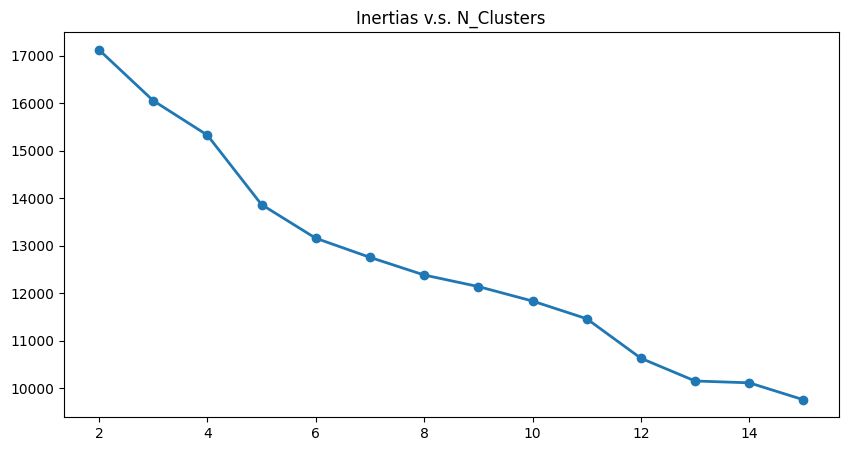

In [99]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_train_clean)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

In [105]:
from sklearn.decomposition import PCA
# Create the PCA model and we use 10 components
pca = PCA(n_components=10)
# Get the components
train_pca= pca.fit_transform(df_train_normal)
# Show the new data
train_pca

array([[ 0.47399434, -1.24455528,  1.034299  , ...,  0.57153656,
        -0.6595296 , -0.24709828],
       [ 0.46961862,  1.28416416, -0.9708767 , ..., -1.18941351,
        -1.91872395,  0.70411877],
       [ 1.17539523, -0.50911298,  1.24598715, ...,  0.40863726,
         1.06197477,  0.62430188],
       ...,
       [ 0.58399397,  2.96628881, -0.38321858, ..., -0.94956027,
        -0.25794996,  2.21473254],
       [-1.30741728, -0.10320978, -2.2199733 , ..., -1.23970459,
        -0.18529982, -1.122028  ],
       [ 0.67495332,  0.6905362 , -0.76837802, ..., -1.73895873,
        -1.07982904, -2.74939732]])

In [106]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.8818005284145563)

In [107]:
### Explained VAR
pca.explained_variance_ratio_

array([0.2350752 , 0.09709192, 0.0900976 , 0.08201342, 0.07191644,
       0.06886814, 0.06524626, 0.06225486, 0.05703015, 0.05220655])

In [115]:
### Cluster KMeans using the PCA
kmeans = KMeans(n_clusters=10, random_state=42).fit(train_pca)
train_cluster= kmeans.fit_predict(train_pca)
train_cluster


array([9, 0, 9, ..., 0, 5, 1], dtype=int32)

In [117]:
### Add cluster to original Df
df_train_clean['cluster'] = train_cluster


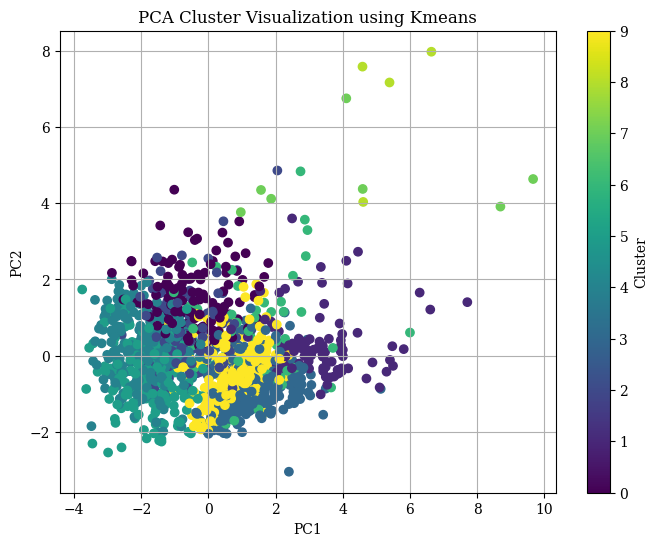

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(train_pca[:,0], train_pca[:,1], c= train_cluster, cmap= 'viridis')
plt.title('PCA Cluster Visualization using Kmeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [119]:
### Cluster distribution
print("Distribution by cluster")
df_train_clean['cluster'].value_counts()

Distribution by cluster


,count
cluster,
4,291
9,266
3,266
5,203
0,153
1,107
2,103
6,60
7,7


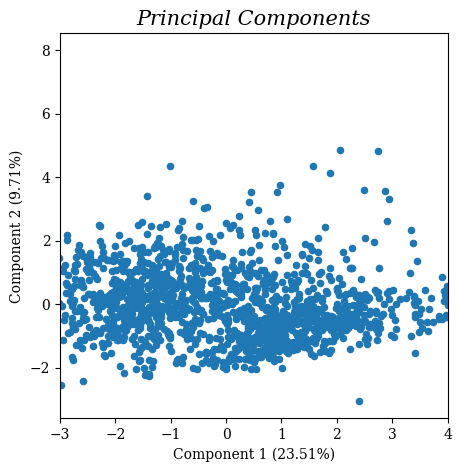

In [113]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
plt.rcParams["font.family"] = "serif"

x_label = 'Component 1 ('+str(round(pca.explained_variance_ratio_[0]*100,2))+'%)'
y_label = 'Component 2 ('+str(round(pca.explained_variance_ratio_[1]*100,2))+'%)'

# Use the index from the original DataFrame
name = df_train_clean.index

ax= fig.add_subplot(1,1,1)
ax.set_xlabel(x_label, fontsize=10)
ax.set_ylabel(y_label, fontsize=10)
ax.set_title("Principal Components", fontsize = 15, fontstyle = 'italic')
ax.set_xlim(-3, 4)

ax.scatter(x=train_pca[:,0], y= train_pca[:,1], s=20)



plt.show()

### The data base is clean

In [50]:
### Correlation
cor=df_train_clean.corr()
cor

,SalePrice,MoSold,YrSold,MSZoning,LotArea,Alley,Utilities,BldgType,OverallCond,YearBuilt,...,Heating,CentralAir,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,PoolArea,WoodDeckSF,OpenPorchSF
SalePrice,1.000000,0.046432,-0.028923,-0.096587,0.263843,-0.092607,0.014314,0.062837,-0.077856,0.522897,...,-0.098812,0.251328,0.560664,0.284108,0.168213,0.466929,0.486362,0.092404,0.324413,0.315856
MoSold,0.046432,1.000000,-0.145721,-0.029558,0.001205,-0.021453,0.051552,-0.025906,-0.003511,0.012398,...,-0.013797,0.009846,0.055872,-0.009050,0.046544,0.046357,0.005337,-0.033737,0.021011,0.071255
YrSold,-0.028923,-0.145721,1.000000,-0.022875,-0.014261,-0.012036,-0.023353,0.000470,0.043950,-0.013618,...,0.011830,-0.009420,-0.019669,-0.010269,-0.036014,-0.024096,-0.001014,-0.059689,0.022270,-0.057619
MSZoning,-0.096587,-0.029558,-0.022875,1.000000,0.014264,-0.272929,-0.002095,-0.061424,0.169507,-0.228528,...,0.037391,0.004236,-0.152862,-0.118121,0.032888,0.042162,-0.232309,0.005496,0.035364,-0.165615
LotArea,0.263843,0.001205,-0.014261,0.014264,1.000000,-0.083668,-0.010123,-0.136296,-0.005636,0.014228,...,0.028158,0.049755,0.126031,0.014259,0.119690,0.271364,-0.024947,0.077672,0.171698,0.084774
Alley,-0.092607,-0.021453,-0.012036,-0.272929,-0.083668,1.000000,0.006362,0.089275,0.038157,-0.171859,...,0.076186,-0.144894,-0.005312,-0.001977,-0.005350,-0.114040,-0.100501,-0.016694,-0.116880,0.074826
Utilities,0.014314,0.051552,-0.023353,-0.002095,-0.010123,0.006362,1.000000,0.004422,-0.009994,0.011505,...,0.003221,-0.006907,0.026862,0.019939,-0.004288,-0.015721,0.022382,0.001798,0.019692,-0.028199
BldgType,0.062837,-0.025906,0.000470,-0.061424,-0.136296,0.089275,0.004422,1.000000,-0.102124,0.241810,...,-0.065845,0.130165,0.021221,-0.021313,-0.330013,0.056533,0.212323,-0.011603,0.068168,0.057964
OverallCond,-0.077856,-0.003511,0.043950,0.169507,-0.005636,0.038157,-0.009994,-0.102124,1.000000,-0.375983,...,-0.090770,0.118969,-0.194149,-0.060769,0.012980,-0.023820,-0.324297,-0.001985,-0.003334,-0.032589
YearBuilt,0.522897,0.012398,-0.013618,-0.228528,0.014228,-0.171859,0.011505,0.241810,-0.375983,1.000000,...,-0.172334,0.381831,0.468271,0.242656,-0.070651,0.147716,0.825667,0.004950,0.224880,0.188686


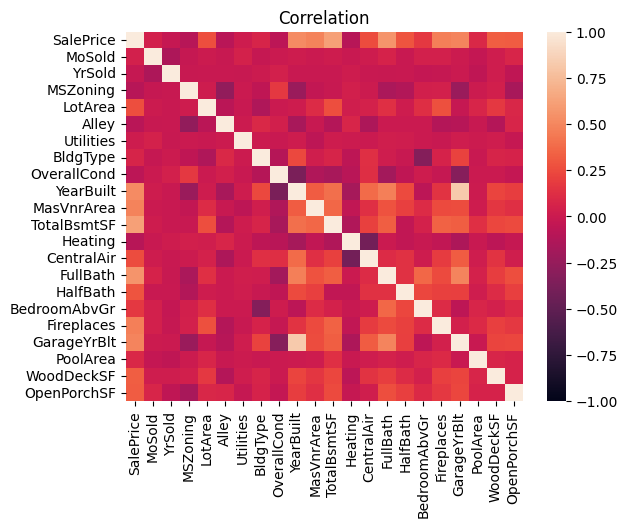

In [51]:
import seaborn as sns
sns.heatmap(cor, vmax=1, vmin=-1)
plt.title('Correlation')
plt.show()

### The variables with more correlation with Sale_Price are

1.   YearBuilt = 0.52
2.   MasVnrArea = 0.477493
3.   TotalBsmtSF = 0.613581
4.   FullBath = 0.560664
5.   Fireplaces	0.466929
6.   GarageYrBlt	0.486362
7.   WoodDeckSF	0.324413
8.   OpenPorchSF	0.315856







In [ ]:
from pathlib import Path
def apply_domain_cleaning(df):
    df = df.copy()
    # 1) NA -> "None"
    none_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
                 "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond",
                 "PoolQC","Fence","MiscFeature","MasVnrType"]
    for c in none_cols:
        if c in df.columns:
            df[c] = df[c].fillna("None")

    # 2) Zero fill
    zero_cols = ["MasVnrArea","GarageCars","GarageArea","TotalBsmtSF",
                 "BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","BsmtFullBath","BsmtHalfBath","PoolArea"]
    for c in zero_cols:
        if c in df.columns:
            df[c] = df[c].fillna(0)

    # 3) LotFrontage median by neighborhood
    if "LotFrontage" in df.columns and "Neighborhood" in df.columns:
        df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
            lambda s: s.fillna(s.median())
        )

    # 4) GarageYrBlt
    if "GarageYrBlt" in df.columns:
        if "GarageType" in df.columns:
            df.loc[df["GarageType"]=="None", "GarageYrBlt"] = df.loc[df["GarageType"]=="None", "GarageYrBlt"].fillna(0)
        if "YearBuilt" in df.columns:
            df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["YearBuilt"])

    # 5) MSZoning in test
    if "MSZoning" in df.columns and "Neighborhood" in df.columns:
        df["MSZoning"] = df.groupby("Neighborhood")["MSZoning"].transform(
            lambda s: s.fillna(s.mode().iloc[0] if not s.mode().empty else "RL")
        )

    # 6) Electrical mode
    if "Electrical" in df.columns:
        df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

    # 7) Functional NA->Typ
    if "Functional" in df.columns:
        df["Functional"] = df["Functional"].fillna("Typ")

    # 8) Drop Utilities
    if "Utilities" in df.columns:
        df = df.drop(columns=["Utilities"])

    # 9) Feature engineering
    if set(["GrLivArea","TotalBsmtSF"]).issubset(df.columns):
        df["TotalSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
    if set(["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath"]).issubset(df.columns):
        df["Baths_Total"] = df["FullBath"] + 0.5*df["HalfBath"] + df["BsmtFullBath"] + 0.5*df["BsmtHalfBath"]
    if set(["YrSold","YearBuilt"]).issubset(df.columns):
        df["Age_Sold"] = df["YrSold"] - df["YearBuilt"]
    if set(["YrSold","YearRemodAdd"]).issubset(df.columns):
        df["Age_Renov"] = df["YrSold"] - df["YearRemodAdd"]
    if set(["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"]).issubset(df.columns):
        df["PorchSF_Total"] = df[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"]].sum(axis=1)
    return df

def drop_grliv_outliers(df):
    return df[~((df["GrLivArea"]>4000) & (df["SalePrice"]<300000))].copy()

X_train = apply_domain_cleaning(df_train)
X_test  = apply_domain_cleaning(df_test)

print(X_train.shape, X_test.shape)
X_train.head()

(1460, 85) (1459, 84)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,Baths_Total,Age_Sold,Age_Renov,PorchSF_Total
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,2,2008,WD,Normal,208500,2566,3.5,5,5,61
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,5,2007,WD,Normal,181500,2524,2.5,31,31,298
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,9,2008,WD,Normal,223500,2706,3.5,7,6,42
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,2,2006,WD,Abnorml,140000,2473,2.0,91,36,307
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,12,2008,WD,Normal,250000,3343,3.5,8,8,276


In [ ]:
# List of non-numeric and categorical variables to drop
variables_to_drop = [
    'MSZoning',    # Categorical variable that needs encoding
    'Street',      # Categorical variable that needs encoding
    'Alley',       # Categorical variable that needs encoding
    'LotShape',    # Categorical variable that needs encoding
    'LandContour', # Categorical variable that needs encoding
    'LotConfig',   # Categorical variable that needs encoding
    'LandSlope',   # Categorical variable that needs encoding
    'Neighborhood', # Categorical variable that needs encoding
    'Condition1',  # Categorical variable that needs encoding
    'Condition2',  # Categorical variable that needs encoding
    'BldgType',    # Categorical variable that needs encoding
    'HouseStyle',  # Categorical variable that needs encoding
    'RoofStyle',   # Categorical variable that needs encoding
    'RoofMatl',    # Categorical variable that needs encoding
    'Exterior1st', # Categorical variable that needs encoding
    'Exterior2nd', # Categorical variable that needs encoding
    'MasVnrType',  # Categorical variable that needs encoding
    'ExterQual',   # Categorical variable that needs encoding
    'ExterCond',   # Categorical variable that needs encoding
    'Foundation',  # Categorical variable that needs encoding
    'BsmtQual',    # Categorical variable that needs encoding
    'BsmtCond',    # Categorical variable that needs encoding
    'BsmtExposure', # Categorical variable that needs encoding
    'BsmtFinType1', # Categorical variable that needs encoding
    'BsmtFinType2', # Categorical variable that needs encoding
    'Heating',     # Categorical variable that needs encoding
    'HeatingQC',   # Categorical variable that needs encoding
    'CentralAir',  # Categorical variable that needs encoding
    'Electrical',  # Categorical variable that needs encoding
    'KitchenQual', # Categorical variable that needs encoding
    'Functional',  # Categorical variable that needs encoding
    'FireplaceQu', # Categorical variable that needs encoding
    'GarageType',  # Categorical variable that needs encoding
    'GarageFinish', # Categorical variable that needs encoding
    'GarageQual',  # Categorical variable that needs encoding
    'GarageCond',  # Categorical variable that needs encoding
    'PavedDrive',  # Categorical variable that needs encoding
    'PoolQC',      # Categorical variable that needs encoding
    'Fence',       # Categorical variable that needs encoding
    'MiscFeature', # Categorical variable that needs encoding
    'SaleType',    # Categorical variable that needs encoding
    'SaleCondition' # Categorical variable that needs encoding

]

# Drop the identified variables
X_train = X_train.drop(columns=variables_to_drop)
X_test = X_test.drop(columns=variables_to_drop)

not_helping_to_drop = ['MSSubClass', 'OverallCond', 'MasVnrArea', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'Age_Renov']

X_train = X_train.drop(columns=not_helping_to_drop)
X_test = X_test.drop(columns=not_helping_to_drop)

In [ ]:
X_train

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,Fireplaces,GarageCars,GarageArea,OpenPorchSF,MoSold,SalePrice,TotalSF,Baths_Total,Age_Sold,PorchSF_Total
0,1,65.0,8450,7,2003,2003,706,150,856,1710,...,0,2,548,61,2,208500,2566,3.5,5,61
1,2,80.0,9600,6,1976,1976,978,284,1262,1262,...,1,2,460,0,5,181500,2524,2.5,31,298
2,3,68.0,11250,7,2001,2002,486,434,920,1786,...,1,2,608,42,9,223500,2706,3.5,7,42
3,4,60.0,9550,7,1915,1970,216,540,756,1717,...,1,3,642,35,2,140000,2473,2.0,91,307
4,5,84.0,14260,8,2000,2000,655,490,1145,2198,...,1,3,836,84,12,250000,3343,3.5,8,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,1999,2000,0,953,953,1647,...,1,2,460,40,8,175000,2600,2.5,8,40
1456,1457,85.0,13175,6,1978,1988,790,589,1542,2073,...,2,2,500,0,2,210000,3615,3.0,32,349
1457,1458,66.0,9042,7,1941,2006,275,877,1152,2340,...,2,1,252,60,5,266500,3492,2.0,69,60
1458,1459,68.0,9717,5,1950,1996,49,0,1078,1078,...,0,1,240,0,4,142125,2156,2.0,60,478


In [ ]:
print(list(X_train.columns))

['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'MoSold', 'SalePrice', 'TotalSF', 'Baths_Total', 'Age_Sold', 'PorchSF_Total']


In [ ]:
X_train.describe()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,...,Fireplaces,GarageCars,GarageArea,OpenPorchSF,MoSold,SalePrice,TotalSF,Baths_Total,Age_Sold,PorchSF_Total
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.199658,10516.828082,6.099315,1971.267808,1984.865753,443.639726,567.240411,1057.429452,1515.463699,...,0.613014,1.767123,472.980137,46.660274,6.321918,180921.195890,2572.893151,2.210616,36.547945,181.329452
std,421.610009,22.431902,9981.264932,1.382997,30.202904,20.645407,456.098091,441.866955,438.705324,525.480383,...,0.644666,0.747315,213.804841,66.256028,2.703626,79442.502883,823.598492,0.785399,30.250152,156.656097
min,1.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,334.000000,1.000000,0.000000,0.000000
25%,365.750000,60.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,1129.500000,...,0.000000,1.000000,334.500000,0.000000,5.000000,129975.000000,2014.000000,2.000000,8.000000,45.000000
50%,730.500000,70.000000,9478.500000,6.000000,1973.000000,1994.000000,383.500000,477.500000,991.500000,1464.000000,...,1.000000,2.000000,480.000000,25.000000,6.000000,163000.000000,2479.000000,2.000000,35.000000,164.000000
75%,1095.250000,80.000000,11601.500000,7.000000,2000.000000,2004.000000,712.250000,808.000000,1298.250000,1776.750000,...,1.000000,2.000000,576.000000,68.000000,8.000000,214000.000000,3008.500000,2.500000,54.000000,266.000000
max,1460.000000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,5644.000000,2336.000000,6110.000000,5642.000000,...,3.000000,4.000000,1418.000000,547.000000,12.000000,755000.000000,11752.000000,6.000000,136.000000,1027.000000


In [ ]:
# Save the DataFrame as a CSV file
X_train.to_csv('/content/drive/MyDrive/ML/housing-prices-ml-project/data/processed/train.csv', index=False)

# Save the DataFrame as a CSV file
X_test.to_csv('/content/drive/MyDrive/ML/housing-prices-ml-project/data/processed/test.csv', index=False)